# Building a Model to Classify Waste as Organic or Recyclable!!

Importing necessary libraries.

In [1]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow_hub as hub



In [2]:
image_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,validation_split=0.2)

img_data_train=image_generator.flow_from_directory('../input/waste-classification-data/DATASET/TRAIN',
                                             target_size=(224,224),subset='training'
                                             )

img_data_val=image_generator.flow_from_directory('../input/waste-classification-data/DATASET/TRAIN',
                                             target_size=(224,224),#Batch size can be changed ,by default its 32
                                             subset='validation') 

Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.


In [3]:
img_data_train.class_indices

{'O': 0, 'R': 1}

In [4]:
for sample_batch,sample_label in img_data_train:
    print(sample_batch.shape)
    print(sample_label.shape)
    break

(32, 224, 224, 3)
(32, 2)


In [5]:
class_names=['Organic','Recyclable']

In [6]:
def display(img_batch,label_batch):
    plt.figure(figsize=(10,9))
    plt.subplots_adjust(wspace=0.7,hspace=0.7)
    for i in range(30):
        plt.subplot(6,5,i+1)
        plt.imshow(img_batch[i])
        plt.title(class_names[np.argmax(label_batch[i])])


# Displaying a Sample of the Training Data

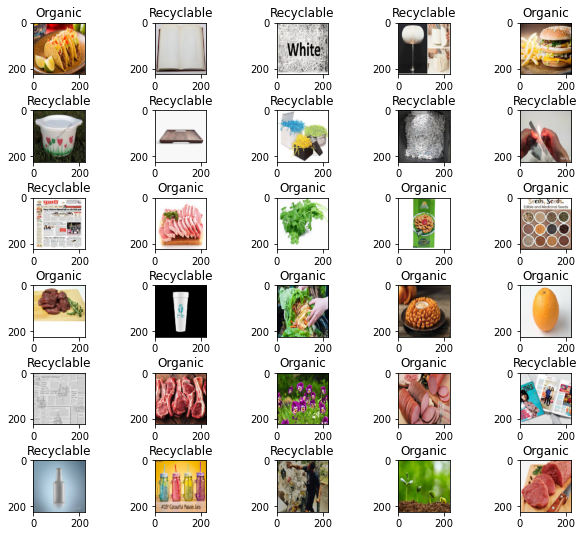

In [7]:
display(sample_batch,sample_label)

****Using ResNet50 feature vector and Compiling using Adam Optimizer****

In [8]:
feature_extract_url="https://tfhub.dev/tensorflow/resnet_50/feature_vector/1"

    
feature_extraction_layer=hub.KerasLayer(str(feature_extract_url),input_shape=(224,224,3))

feature_extraction_layer.trainable=False

In [9]:

model=tf.keras.Sequential([
feature_extraction_layer,
keras.layers.Dropout(0.5),

tf.keras.layers.Dense(50,activation='relu'),
keras.layers.Dropout(0.3),
    
tf.keras.layers.Dense(img_data_train.num_classes,activation='sigmoid')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



# Data is sufficiently large , therefore model doesn't overfit for small number of epochs and generalizes well.

Steps defines number of steps per epoch.

In [10]:

steps=np.ceil(img_data_train.samples/img_data_train.batch_size)

history=model.fit(img_data_train,epochs=5,validation_data=img_data_val,steps_per_epoch=steps)

Epoch 1/5
565/565 [==============================] - 81s 144ms/step - loss: 0.2287 - accuracy: 0.9143 - val_loss: 0.1284 - val_accuracy: 0.9561
Epoch 2/5
565/565 [==============================] - 56s 99ms/step - loss: 0.1754 - accuracy: 0.9360 - val_loss: 0.1213 - val_accuracy: 0.9639
Epoch 3/5
565/565 [==============================] - 54s 96ms/step - loss: 0.1531 - accuracy: 0.9420 - val_loss: 0.1165 - val_accuracy: 0.9614
Epoch 4/5
565/565 [==============================] - 55s 98ms/step - loss: 0.1426 - accuracy: 0.9472 - val_loss: 0.1327 - val_accuracy: 0.9603
Epoch 5/5
565/565 [==============================] - 54s 96ms/step - loss: 0.1350 - accuracy: 0.9505 - val_loss: 0.1269 - val_accuracy: 0.9561


# Test Accuracy:

In [11]:
test_data=image_generator.flow_from_directory(str('../input/waste-classification-data/DATASET/TEST'),
                                             target_size=(224,224),#Batch size can be changed ,by default its 32
                                             )

model.evaluate(test_data)

Found 2513 images belonging to 2 classes.
79/79 [==============================] - 9s 108ms/step - loss: 0.2189 - accuracy: 0.9316


[0.21894265711307526, 0.9315559267997742]

In [12]:
from keras.preprocessing import image
from PIL import Image

# Test your own Image :D

Just change the path after uploading test image.

Input img shape: (1, 224, 224, 3)


Text(0.5, 1.0, 'Material is Recyclable')

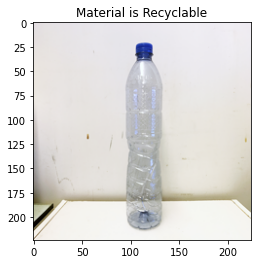

In [13]:
# FOR TESTING YOUR OWN IMAGE

img_path='../input/usertest/test.jpg'
img=image.load_img(img_path,target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=x/255
print('Input img shape:',x.shape)

my_img=Image.open(img_path)
my_img=my_img.resize((224,224))
plt.imshow(my_img)
pred=model.predict(x)
plt.title(f'Material is {class_names[np.argmax(pred)]}')